# Concrete Compressive Strength Regression Project
## 콘크리트 압축 강도 회귀 분석
https://www.kaggle.com/datasets/niteshyadav3103/concrete-compressive-strength

<br>

#### feature (6개)
- Cement: 시멘트 양 (kg/m^3)
- BlastFurnaceSlag: 고로 슬래그 양 (kg/m^3)
- FlyAsh: 플라이 애시(불연재) 양 (kg/m^3)
- Water: 물 양 (kg/m^3)
- Superplasticizer: 고성능 플라스틱화제 양 (kg/m^3)
- CoarseAggregate: 거친 골재 양 (kg/m^3)
- FineAggregate: 미분 골재 양 (kg/m^3)
- Age: 콘크리트의 나이 (일)


<br>

#### target
- Concretecompressivestrength: 콘크리트의 압축 강도 (MPa)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import pandas as pd

# 데이터 호출
c_df = pd.read_csv('./datasets/ConcreteCompressiveStrength.csv', low_memory=False)
c_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


### 🌟 1Cycle

#### 📊 데이터 전처리

In [3]:
# 중복행 제거 
pre_c_df = c_df.drop_duplicates().reset_index(drop=True)

In [4]:
# 컬럼명 변경
pre_c_df.columns = ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
                    'CoarseAggregate', 'FineAggregate', 'Age', 'Concretecompressivestrength']

In [5]:
# 타겟 데이터 이상치 제거
from sklearn.preprocessing import StandardScaler

# 표준화 객체 생성
std = StandardScaler()
# 데이터 표준화 변환
result = std.fit_transform(pre_c_df[['Concretecompressivestrength']])
# 표준화 데이터 프레임 생성
std_c_df = pd.DataFrame(result, columns=['Concretecompressivestrength'])

# 타겟 데이터 이상치 제거
std_c_df = std_c_df[std_c_df.Concretecompressivestrength.between(-1.96, 1.96)]

# 이상치 제거후 유지되는 인덱스를 대조하여 원본 데이터 이상치 제거
pre_c_df = pre_c_df.iloc[std_c_df.index].reset_index(drop=True)

#### 🚩 1Cycle 결과
- 선형 회귀  
**MSE: 95.7657, RMSE: 9.7860, MSLE: 0.1077, RMSLE: 0.3282, R2: 0.4975**

- 다중 회귀  
**MSE: 39.6896, RMSE: 6.3000, MSLE: 0.0451, RMSLE: 0.2123, R2: 0.7917**

- 회귀 모델(LGBMRegressor)  
**MSE: 20.8537, RMSE: 4.5666, MSLE: 0.0284, RMSLE: 0.1686, R2: 0.8906**

#### 💡 분석
- 선형 회귀 분석 결과 R2 점수가 0.4975로 나타나는 반면, 다중회귀 시 R2 점수가 0.7917로 나타남에 따라 비선형 패턴을 띄고 있음을 확인함.
- 회귀 모델 중 LGBM 사용 시 R2 점수가 0.8906까지 상승함에 따라, 해당 모델을 선택하는 것이 적합하다고 판단됨.

---

### 🌟 2Cycle
OLS, VIF, 상관관계 등 다양한 지표 확인 후 전처리

#### 💡 분석
- 상관관계가 낮은 'FlyAsh', 'BlastFurnaceSlag' 피처 제거 후 성능 확인이 필요함.
- P>|t|, 다중 공산성에 문제가 있고 상관관계가 낮은 피처 CoarseAggregate, FineAggregate를 제거 후 성능 확인이 필요함.

In [6]:
columns = ['CoarseAggregate', 'FineAggregate', 'FlyAsh', 'BlastFurnaceSlag']

# 불필요한 컬럼 제거
pre_c_df = pre_c_df.drop(columns=columns, axis=1)

#### 🚩 1Cycle 결과
- 회귀 모델(LGBMRegressor)  
**MSE: 20.8537, RMSE: 4.5666, MSLE: 0.0284, RMSLE: 0.1686, R2: 0.8906**

#### 🚩 2Cycle 결과
- OLS(LGBMRegressor)  
**MSE: 36.3488, RMSE: 6.0290, MSLE: 0.0512, RMSLE: 0.2262, R2: 0.8093**

#### 💡 분석
- 상관관계가 낮은 피처 제거 후 성능이 저하된 것을 확인하였지만, 다중 공산성을 해결하기 위해 제거하기로 함.
- 교차 검증을 진행한 후 모델 성능 확인이 필요함.

---

### 🌟 3Cycle
K-Fold, GridSearchCV를 통한 교차검증

#### 🚩 2Cycle 결과
- OLS(LGBMRegressor)  
**MSE: 36.3488, RMSE: 6.0290, MSLE: 0.0512, RMSLE: 0.2262, R2: 0.8093**

#### 🚩 3Cycle 결과
- K-Fold (GridSearchCV)  
**MSE: 30.1393, RMSE: 5.4899, MSLE: 0.0412, RMSLE: 0.2030, R2: 0.8418**

#### 💡 분석
- K-Fold를 통해 교차 검증 후 성능이 더 향상된 것을 확인했으며,  
  표준화 및 정규화 진행 후 성능 차이 확인이 필요함.

---

### 🌟 4Cycle
StandardScaler, MinMaxScaler를 통한 전처리

#### 🚩 3Cycle 결과
- K-Fold (GridSearchCV)  
**MSE: 30.1393, RMSE: 5.4899, MSLE: 0.0412, RMSLE: 0.2030, R2: 0.8418**

#### 🚩 4Cycle 결과
- StandardScaler  
**MSE: 29.3676, RMSE: 5.4192, MSLE: 0.0421, RMSLE: 0.2051, R2: 0.8459**

- MinMaxScaler  
**MSE: 30.1393, RMSE: 5.4899, MSLE: 0.0412, RMSLE: 0.2030, R2: 0.8418**

#### 💡 분석
- 표준화, 정규화 중 표준화 진행 시 이전보다 성능이 더 향상된 것으로 나타남에 따라 표준화 모델을 선택하는 것이 적합함.
- 차원축소 진행 후 성능 차이 확인이 필요함.

---

### 🌟 5Cycle
PCA를 통한 차원 축소

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(MSLE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
         .format(MSE, RMSE, MSLE, RMSLE, R2))

#### 📊 PCA (차원축소)

In [8]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 파이프 라인 구축
pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=2)), ('lgb_r', LGBMRegressor(random_state=124))])

# 파라미터 값 조정
parameters = {'lgb_r__n_estimators': [250, 300],'lgb_r__learning_rate': [0.2], 'lgb_r__max_depth': [20, 30]}

# 교차검증
kfold = KFold(n_splits=5, random_state=124, shuffle=True)

# 학습 및 교차 검증 모델 설정
pca_lgb_r = GridSearchCV(pipe, param_grid=parameters, cv=kfold, n_jobs=-1)

# 훈련
pca_lgb_r.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000925 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 771, number of used features: 2
[LightGBM] [Info] Start training from score 34.036860
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

GridSearchCV(cv=KFold(n_splits=5, random_state=124, shuffle=True),
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('lgb_r',
                                        LGBMRegressor(random_state=124))]),
             n_jobs=-1,
             param_grid={'lgb_r__learning_rate': [0.2],
                         'lgb_r__max_depth': [20, 30],
                         'lgb_r__n_estimators': [250, 300]})

In [9]:
# 최적의 모델
pca_lgb_r = pca_lgb_r.best_estimator_

# 예측
prediction = pca_lgb_r.predict(X_test)

# 평가
get_evaluation(y_test, prediction)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
MSE: 113.2159, RMSE: 10.6403, MSLE: 0.1358, RMSLE: 0.3685, R2: 0.4059


#### 📊 시각화

In [10]:
cycle5_data = {
    'model': ['StandardScaler', 'PCA'],
    'R2': [0.8459, 0.4088],
}

cycle5 = pd.DataFrame(cycle5_data)

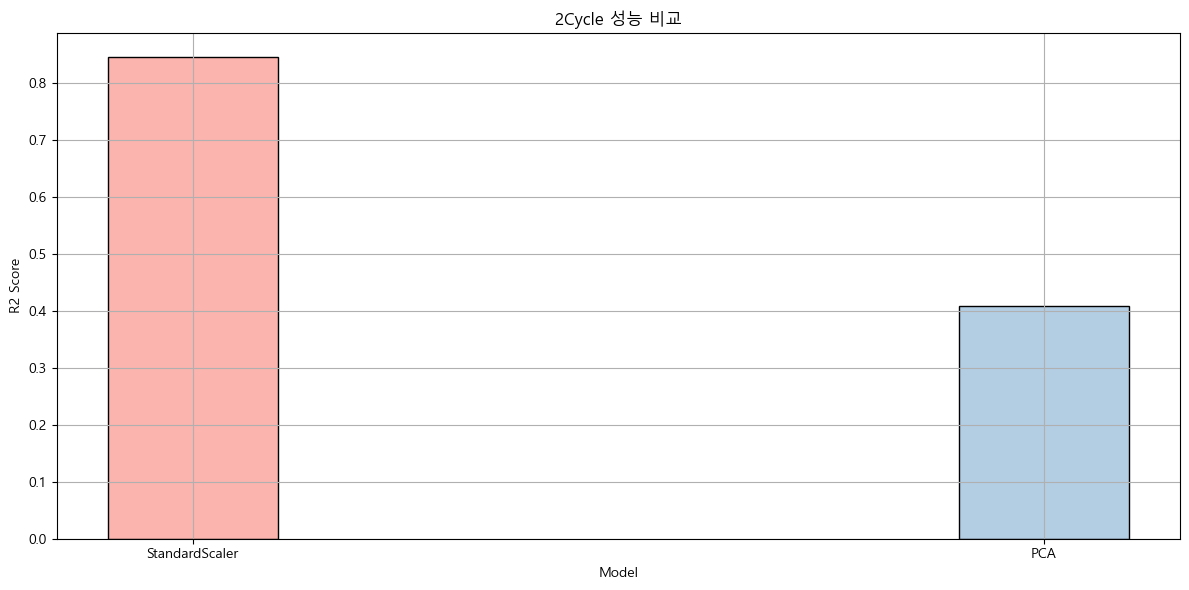

,model,R2
0,StandardScaler,0.8459
1,PCA,0.4088


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

plt.bar(cycle5['model'], cycle5['R2'], color=cmap(np.array([0, 1, 2])), edgecolor='black', width=0.2)
plt.title('2Cycle 성능 비교')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.grid(True)

# # y축의 범위 지정
# plt.ylim(0.8, 0.85)

plt.tight_layout()
plt.show()

display(cycle5)

#### 🚩 4Cycle 결과
- StandardScaler  
**MSE: 29.3676, RMSE: 5.4192, MSLE: 0.0421, RMSLE: 0.2051, R2: 0.8459**

#### 🚩 3Cycle 결과
- PCA  
**MSE: 112.6610, RMSE: 10.6142, MSLE: 0.1345, RMSLE: 0.3667, R2: 0.4088**

#### 💡 분석
- 차원 축소 시 성능이 저하되는 것으로 나타남에 따라 별도의 차원축소 처리는 진행하지 않음.
- 과적합 여부를 확인하여 모델이 적합한지 판단하고 규제 적용 여부를 확인해 보기로 함.